In [1]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.python.keras.utils.np_utils import to_categorical
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
digits_train = pd.read_csv("data/train.csv")


#input data for awnsering opdracht
digits_test = pd.read_csv("data/test.csv")
test_data_in = digits_test.to_numpy()
test_data = np.reshape(test_data_in, (test_data_in.shape[0], 28, 28))
test_data = np.expand_dims(test_data, axis=3)

#split traindata for train and validation data and labels
msk = np.random.rand(len(digits_train)) < 0.8
train = digits_train[msk]
val = digits_train[~msk]

#to numpy
train_data_in = train.to_numpy()
val_data_in = val.to_numpy()


# get labels
train_labels = train_data_in[:, 0]  # get first colom from the training data
val_labels = val_data_in[:, 0]  # get first colom from the training data
train_data_without_label = train_data_in[:, 1:]  # remove first colom (labels) from the training data
val_data_without_label = val_data_in[:, 1:]  # remove first colom (labels) from the training data


# make a 3d array (size, 28, 28)
train_data = np.reshape(train_data_without_label, (train_data_without_label.shape[0], 28, 28))
val_data = np.reshape(val_data_without_label, (val_data_without_label.shape[0], 28, 28))

# make proper dimensions
train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)

print(train_labels.shape)
print(train_data.shape)
print(val_labels.shape)
print(val_data.shape)
print(test_data.shape)

(33619,)
(33619, 28, 28, 1)
(8381,)
(8381, 28, 28, 1)
(28000, 28, 28, 1)


In [3]:
# variables for model
num_filters = 2
filter_size = (3, 3)
pool_size = (3, 3)

model = Sequential([])

model.add(Conv2D(num_filters, filter_size, padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Epoch 1/10
1051/1051 [==============================] - 17s 4ms/step - loss: 19.2706 - accuracy: 0.6986 - val_loss: 3.7827 - val_accuracy: 0.7943
Epoch 2/10
1051/1051 [==============================] - 4s 4ms/step - loss: 1.8281 - accuracy: 0.8261 - val_loss: 0.9713 - val_accuracy: 0.8339
Epoch 3/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.5738 - accuracy: 0.8539 - val_loss: 0.4591 - val_accuracy: 0.8610
Epoch 4/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.4087 - accuracy: 0.8768 - val_loss: 0.4162 - val_accuracy: 0.8695
Epoch 5/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.3755 - accuracy: 0.8860 - val_loss: 0.3878 - val_accuracy: 0.8820
Epoch 6/10
1051/1051 [==============================] - 4s 4ms/step - loss: 0.3537 - accuracy: 0.8936 - val_loss: 0.3536 - val_accuracy: 0.8908
Epoch 7/10
1051/1051 [==============================] - 5s 5ms/step - loss: 0.3298 - accuracy: 0.9003 - val_loss: 0.3370 - val_accurac

In [5]:
test_loss, test_acc = model.evaluate(train_data,  train_labels, verbose=2)
print("accuracy = {}".format(test_acc))

1051/1051 - 2s - loss: 0.2553 - accuracy: 0.9239
accuracy = 0.9239417910575867


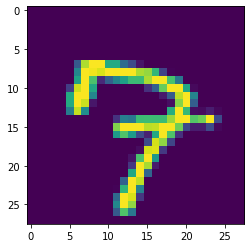

(28, 28, 1)
[[5.9087506e-07 7.5357214e-11 1.7350634e-07 3.0959461e-06 9.5507252e-04
  2.1798683e-06 4.1052733e-08 9.9580801e-01 1.4148290e-04 3.0893546e-03]]
7


In [13]:
plt.imshow(test_data[5, :, :, 0])
plt.show()
print(test_data[4].shape)
x = np.expand_dims(test_data[5], axis=0)
prediction = model.predict(x)
print(prediction)
print(np.argmax(prediction))